# MACD

**Convergência-Divergência da Média Móvel** - é o relacionamento entre duas médias móveis exponenciais (EMA) dos preços de uma ação.

**Cálculo:** É subtração da EMA de 12 com a EMA de 26.

`MACD = 12_EMA - 26_EMA`

**Como usar:** Calculamos uma nova EMA, dessa vez de 9 períodos, a qual chamamos de **Signal**, e a comparamos com o MACD calculado acima. Quando a MACD o Signal cruza para cima, há uma indicação de compra. E quando o MACD cruza o Signal para baixo, há uma indicação de venda.

In [33]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
# Datasource
ds_yahoo = 'yahoo'

# Período de um ano atrás a partir de hoje
last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

In [34]:
itau = web.DataReader('ITUB4.SA', ds_yahoo, start, end)

In [35]:
itau['12-MACD'] = itau['Adj Close'].ewm(span=12, adjust=False).mean()
itau['26-MACD'] = itau['Adj Close'].ewm(span=26, adjust=False).mean()

itau['MACD'] = itau['12-MACD'] - itau['26-MACD']

itau['Signal'] = itau['MACD'].ewm(span=9, adjust=False).mean()

## Gráfico MACD x Signal

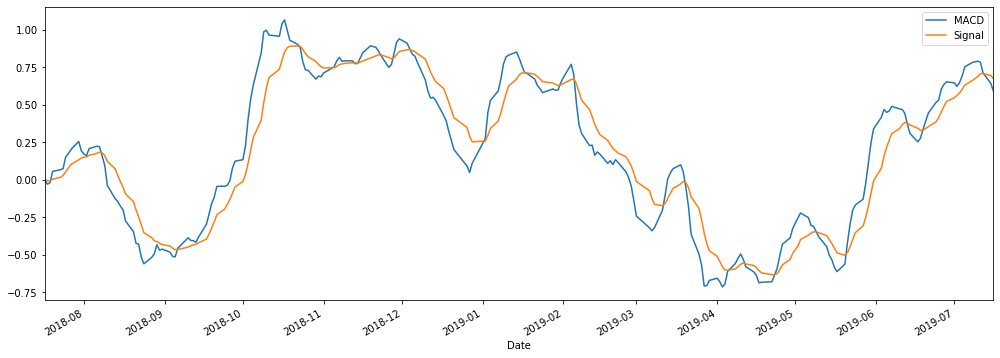

In [36]:
itau[['MACD', 'Signal']].plot(figsize=(17,6));